<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Fashion_MNIST_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST

## Introduction

This dataset is the analog of the MNIST dataset. It conatins sample images of ten types of clothing articles. We'll build and train a neural network to categorize the clothing type. The neural network is a multi-layer perceptron. The term **perceptron** seems to be used ambiguously in different resources. I use the **perception** to mean a layer, which consists of **neurons** or **TLUs**. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Data

We use the Keras API to load this built-in dataset. The load_data() method returns train and test sets already separated. There are 60,000 training samples and 10,000 testing samples. 

The samples are 28x28 grayscale images in the format of numpy arrays. Each entry is some pixel intensity from 0 to 255. The datatype is an 8-bit unsigned integer. Lables range from 0 to 9 according to the following:

|      0      |    1    |     2    | 3     | 4    | 5      | 6     | 7       | 8   | 9          |
|:-----------:|:-------:|:--------:|-------|------|--------|-------|---------|-----|------------|
| T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle Boot |

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data();
assert x_train.shape == (60000, 28, 28);
assert y_train.shape == (60000,);
assert x_test.shape == (10000, 28, 28);
assert y_test.shape == (10000,);

Labels are numeric so we'll create a list of their names. 

We also **normalize** the features for better optimization. Feature scaling helps allow the step to not overshoot or undershoot since gradients along each dimension are closer. 

In [3]:
y_labels = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'];
x_train = x_train/255.0;

In [4]:
x_valid, y_valid = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[5000:], y_train[5000:]

## Preview

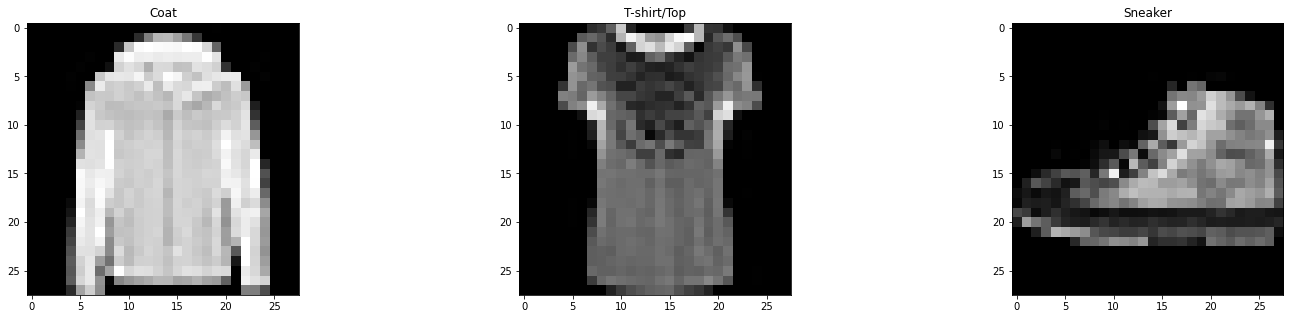

In [5]:
fig, ax = plt.subplots(1,3, figsize=(25,5))
ax[0].imshow(x_train[0], cmap='gray')
ax[0].set_title(y_labels[y_train[0]])
ax[1].imshow(x_train[1], cmap='gray')
ax[1].set_title(y_labels[y_train[1]])
ax[2].imshow(x_train[2], cmap='gray')
ax[2].set_title(y_labels[y_train[2]])
plt.show()


# Model

Our model will consist of  one input layer, two hidden layers, and one output layer. Each of the hidden layers are dense, meaning each neuron is connected to each of the previous layers neurons.

**ReLU**

The ReLU activation function is default for many neural networks, according to sources. ReLU is a piecewise linear function that zeros out negative output and leaves positive outputs alone. There are several benefits to ReLU over the S-shaped activations such as ```sigmoid``` and ```tanh```. The non-linearity of the entire function allows for learning non-linear patterns. Meanwhile the derivative is constant (peicewise),

$
\dfrac{d}{dx} ReLU(x) = 
\begin{cases} 
      0 & x \lt 0 \\
      1 & x \geq 0 
\end{cases}
$

The constant derivative matters when dealing with deep networks because of how the backpropagation algorithm works. Backpropogation is the algorithm used to calculate gradients on a neural network. 

**Softmax**

The final layers uses a softmax activation function, also known as a normalized exponential.

$
\hat{p_k} = \sigma(s(x))_k = \dfrac{exp(s_k(x))}{\sum\limits_{j=1}^K exp(s_j(x))}
$

[A. Geron - Hands-on Machine Learning... pg 148]

Each neuron in the output layer outputs a probability $p_k$ given by the $k^{th}$ component of the softmax functions output. The softmax function takes the exponential of all neurons and normalizes them. 



In [6]:
model = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(300, activation='relu'),
     keras.layers.Dense(300, activation='relu'),
     keras.layers.Dense(10, activation='softmax')
    ]
)

## Compile

We use ```sparse_categorical_crossentropy``` because the labels are provided as integers, with each integer corresponding to a class. I speculate that there is a layer of processing that converts the integers into one-hot vectors with the corresponding class selected to be evaluated with regular cross entropy. Recall that the regular cross entropy is given by

$
J(Θ) ∝ ∑\limits_{i} ∑\limits_{k} y_k^i log(\hat{p}_k^i).
$

The cost function is used in optimizing but the accuracy metric is specified to get an overview of the models performance. 

In [7]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

# Training and Evaluation

In [8]:
model_training_history = model.fit(
    x_train,
    y_train,
    epochs=40,
    validation_data=(x_valid, y_valid)
)

Epoch 1/40
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7271 - accuracy: 0.7629 - val_loss: 0.5446 - val_accuracy: 0.8122
Epoch 2/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4919 - accuracy: 0.8274 - val_loss: 0.4403 - val_accuracy: 0.8522
Epoch 3/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4476 - accuracy: 0.8423 - val_loss: 0.4202 - val_accuracy: 0.8592
Epoch 4/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4195 - accuracy: 0.8542 - val_loss: 0.4071 - val_accuracy: 0.8602
Epoch 5/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4001 - accuracy: 0.8596 - val_loss: 0.3882 - val_accuracy: 0.8670
Epoch 6/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3825 - accuracy: 0.8633 - val_loss: 0.3783 - val_accuracy: 0.8714
Epoch 7/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3699 - accuracy: 0.8688 - val_loss: 0.3741 - val_accuracy

**History**
The ```fit()``` method returns a ```History``` object containing training parameters. The .history property, in particular, is a dictionary of metrics during training. We'll plot them to see how 

In [9]:
model_training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

We'll tabulate and plot the history metrics of our model. The validation and training curves are close to each other, so there isn't much overfitting going on. The validation set acts as a test set during training.

In [10]:
model_training_metrics_pd = pd.DataFrame(model_training_history.history);
model_training_metrics_pd.head()

,loss,accuracy,val_loss,val_accuracy
0,0.727056,0.762891,0.544592,0.8122
1,0.491900,0.827418,0.440343,0.8522
2,0.447589,0.842273,0.420169,0.8592
3,0.419456,0.854164,0.407132,0.8602
4,0.400119,0.859618,0.388175,0.8670


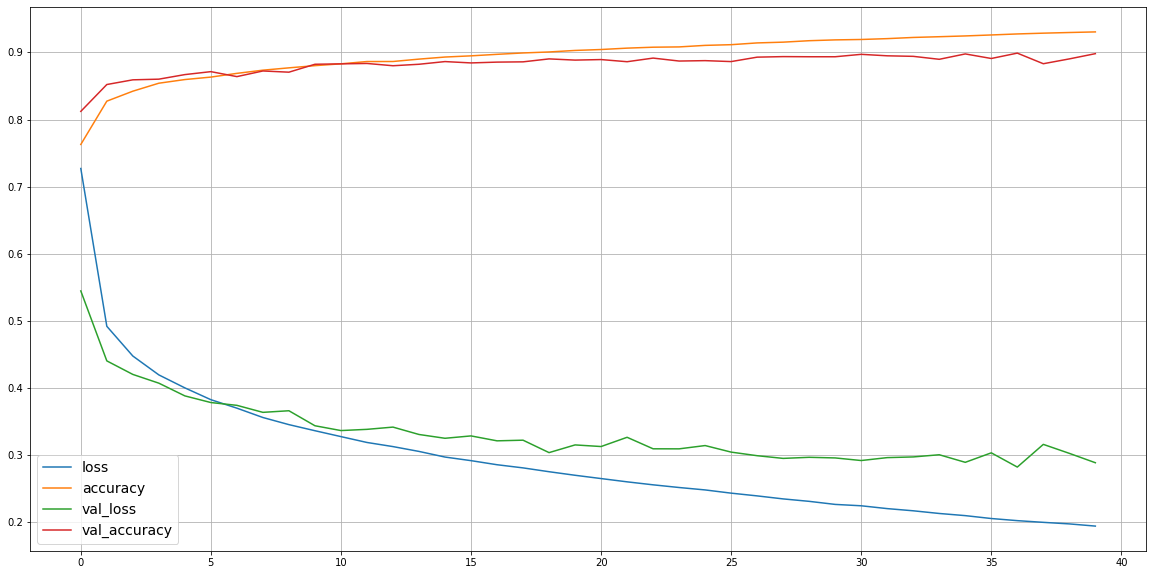

In [11]:
model_training_metrics_pd.plot(figsize=(20,10))
plt.legend(loc="lower left", fontsize=14)
plt.grid()

## Evaluate

Loss and accuracy are evaluated for the test set.

In [13]:
evaluate_result = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 67.9114 - accuracy: 0.8472


# Comments

At this point, we're not tuning hyperparameters and will settle with our results. This notebook gives a run at building a sequential model using Keras. To get a deeper understanding, Andrew Ng's Coursera ML course gives a mathematical treatment of neural networks. The neural network section there requires on write implement the forward prop and backprop in MATLAB.